In [ ]:
# Business Vision:
# To encourage more users to come to WebMD by creating an app that would help woman 40 years and above. 

In [ ]:
# 
# Hypothesis: It is possible to create a model that has an accuracy over 90% 
# and also have a very low false negative (actually cancerous but marked as 
# safe) 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.shape

(569, 33)

In [22]:
dataB = data.columns[data.isnull().any()]
data[dataB].isnull().sum()

Unnamed: 32    569
dtype: int64

In [ ]:
# 'Unnamed: 32' should be dropped in order to clean the dataset before 
# creating the correlation matrix.

<AxesSubplot:>

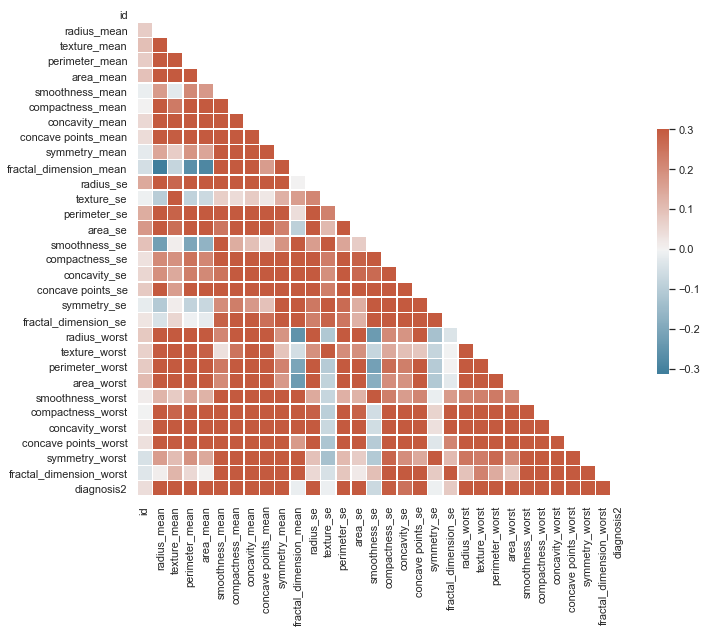

In [24]:
# Changing Target variable to numerical
data['diagnosis2'] = np.where(data['diagnosis']=="M",1,0)
# Code for the correlation matrix and target variable segment of correlation
# matrix
sns.set_theme(style="white")
corr = data.drop(columns=['Unnamed: 32']).corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
corr.diagnosis2

id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [10]:
# Identified that 'concave points_mean', 'radius_worst' and 'concave 
# points_worst' were the most predictive factors

In [ ]:
# Traiing DecisionTree Model 
# with all predictive models

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
data1 = data.drop(columns=['diagnosis2','diagnosis','Unnamed: 32'])
target = data['diagnosis2']
trainX = data1[0:400]
trainY = target[0:400]
testX  = data1[401:]
testY  = target[401:]
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(trainX,trainY)
y_pred = clf.predict(testX)
print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Accuracy: 0.8571428571428571


In [ ]:
# Accuracy of the model is only 85%. This is not sufficient for the hypothesis

In [ ]:
# Traiing DecisionTree Model with the three most predictive factors

In [16]:
data2 = data[['concave points_mean','radius_worst','concave points_worst']]
target2 = data[['diagnosis2']] 
clf = DecisionTreeClassifier()
clf = clf.fit(data2[0:400],target2[0:400])
pred2 = clf.predict(data2[401:])
print("Accuracy:",metrics.accuracy_score(target2[401:],pred2))

Accuracy: 0.9404761904761905


In [20]:
# Assessment of the products accuracy
# Accuracy of the model is 94%. This is sufficient for the first part of the
# hypothesis

In [18]:
testY  = target2[401:]


def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==1 and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i] !=y_hat[i]:
           FP += 1
        if y_actual[i]==0 and y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

a = perf_measure(testY.values,pred2)
print(a)

(35, 7, 123, 3)


In [19]:
# Only 3 false-negatives, out of 168 records
# 1.7% false-negative. This is sufficient for the second part of the hypothesis.
# The hypothesis has been met.